# Derivation of the future value of continous wages

The present value of a differential bit of labor $dt$ earning the wage-rate $\alpha$ is $dPV = \alpha dt$. In English, the wages you've earned is your wage rate (e.g. $/hour or yearly salary) times the amount of time worked.

The differential future value $dFV$ of $dPV$ at time $t=T$ is the related rate $dFV = dPVe^{-r(T-t)}$, where $r$ is the interest rate, and $T$ is the length of our pay period (often ~14 days for employees, or monthly for independent contractors). We have the minus sign in the exponent because we are discounting our wages until we actually receive them at time $T$.

Then, the instantaneous discount rate $\frac{dFV}{dPV}$ is unsurprisingly just $e^{-r(T-t)}$.

Since interest rates are usually expressed on an annual basis while pay periods are usually expressed in terms of number of days: $\frac{dFV}{dPV}=e^{-r(T-t)/365}$

In [11]:
import sympy as sp

r, T, t = sp.symbols("r T t")
discount_rate = sp.exp(-r * (T - t) / 365)
discount_rate

exp(-r*(T - t)/365)

Let's plot the discount rate for an interest rate of 6% per year, over the course of a 14-day pay period.

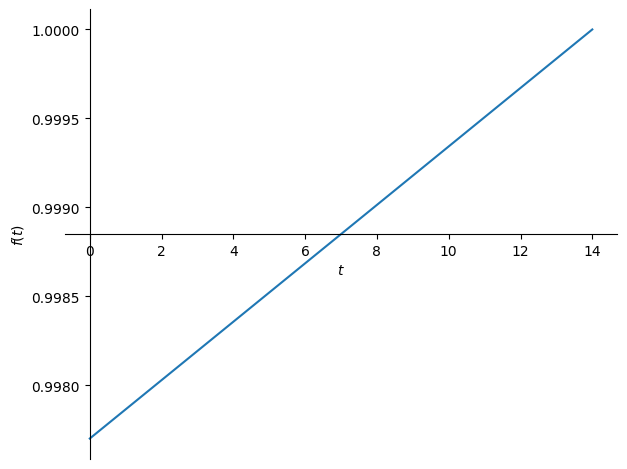

In [2]:
sp.plot(discount_rate.subs({r: 0.06, T: 14}), (t, 0, 14));

We find that your labor is worth (a microscopic bit) less at the beginning of the pay period, due to the impact of compound interest (opportunity cost) on the wages you've earned but haven't been paid.

...so I guess if you have the option, try to do less work at the beginning of your pay period and more towards the end?

So how much is this costing you?

Integrating $\frac{dFV}{dPV}$ from $t=0$ to $t=T$ gives us the deficit per pay period:

$$\int_{0}^{T} \alpha e^{-r(T-t)/365} \, dt = \frac{365\alpha}{r}(1-e^{-Tr/365})$$

We see when $r=0$ we get $T\alpha$, which is exactly what we'd expect: if there's no discount, you simply earn your wage rate times labor time.

Mathematically:

$$\lim_{r \to 0} \frac{365\alpha}{r}(1-e^{-Tr/365}) = \alpha T$$

Because although $\lim_{r \to 0} \frac{365\alpha}{r} = \infty$, this is countered by multiplying by $\lim_{r \to 0} 1-e^{-Tr/365} = 0$.

In [14]:
α = sp.symbols("α")
deficit = (α * discount_rate).integrate((t, 0, T))
deficit

Piecewise((365*α/r - 365*α*exp(-T*r/365)/r, (r > -oo) & (r < oo) & Ne(r, 0)), (T*α, True))

How much does this cost us annually?

Multiply by $T^{-1}$ pay periods per year:

$$\frac{365\alpha}{rT}(1-e^{-Tr/365})$$

We can now plot the annual deficit as a function of $T$ and $r$. Let's assume the wage rate is a salary of $80,000 per year.

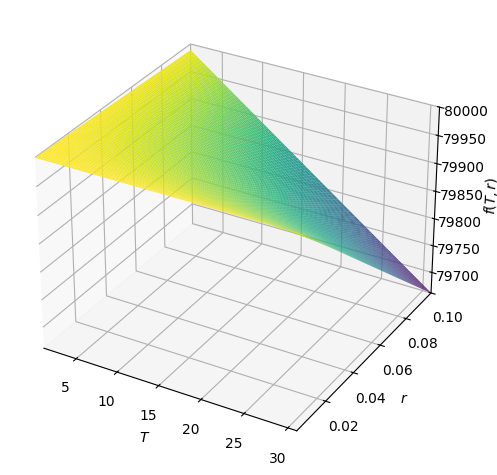

In [4]:
from sympy.plotting import plot3d

annual_deficit = deficit / T
plot3d(annual_deficit.subs({α: 80_000.0}), (T, 1, 31), (r, 1e-6, 1e-1));

Unsurprisingly:

1. Things get worse as the interest rate goes up
1. Things also get worse when you paychecks are less frequent — compound interest gets more time to discount your wages exponentially.

Concretely, let's say at a salary of $80,000, an interest rate of 6%, and a 2-week pay period:

In [5]:
(annual_deficit - α).subs({α: 80_000.0, r: 0.06, T: 14})

-91.9842177557140

You're losing a whopping $61 a year due to unpaid accrued wage interest. Bummer!

We can also study the effect of the pay interval on annual pay. It's virtually linear — getting paid monthly loses you about 4x as much as getting paid weekly!

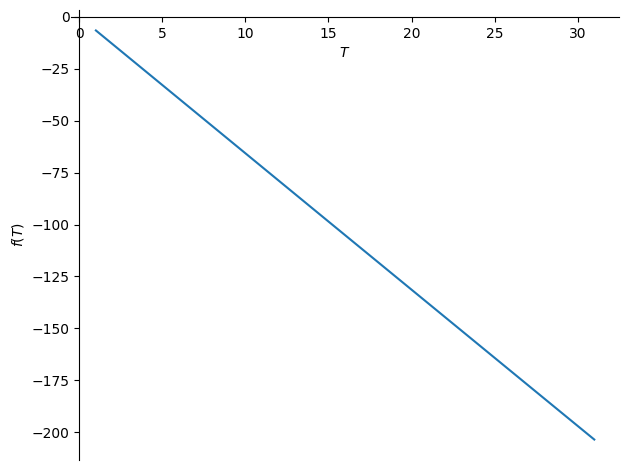

In [20]:
sp.plot((annual_deficit - α).subs({α: 80_000.0, r: 0.06}), (T, 1, 31));